In [9]:
import matplotlib.pyplot as plt

title = "Numbers"
row_length = 150
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 30
candidate = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}

In [10]:
from IPython.display import Markdown
# Define a variable
# Display the variable's value in Markdown
contents = f"### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|sum|0|10|20|30|40|",
              "|--|--|--|--|--|--|--|--|--|"
             ]
rows_dict = {1:[], 10:[], 20:[], 30:[], 40:[]}
nums_t = []
sums = []
cur_table_limit = 0
print(f'row\'s len = {len(rows)}')
for row in rows:
    cols = row.split('|')
    if len(cols) == 3:
        num_00 = 0
        num_10 = 0
        num_20 = 0
        num_30 = 0
        num_40 = 0
        nums_list = [int(i) for i in cols[1].split(',')]
        for num in nums_list:
            if num < 10:
                num_00 += 1
            if num >= 10 and num < 20:
                num_10 += 1
            if num >= 20 and num < 30:
                num_20 += 1
            if num >= 30 and num < 40:
                num_30 += 1
            if num >= 40 :
                num_40 += 1
        rows_dict[1].append(num_00)
        rows_dict[10].append(num_10)
        rows_dict[20].append(num_20)
        rows_dict[30].append(num_30)
        rows_dict[40].append(num_40)
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|{sum(nums_list)}|{num_00}|{num_10}|{num_20}|{num_30}|{num_40}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str
Markdown(contents)

row's len = 150


### Numbers
|round|numbers|bonus|sum|0|10|20|30|40|
|--|--|--|--|--|--|--|--|--|
|1179|05,06,11,27,43,44|17|136|2|1|1|0|2|
|1178|05,06,11,27,43,44|17|136|2|1|1|0|2|
|1177|03,07,15,16,19,43|21|103|2|3|0|0|1|
|1176|07,09,11,21,30,35|29|113|2|1|1|2|0|
|1175|03,04,06,08,32,42|31|95|4|0|0|1|1|
|1174|08,11,14,17,36,39|22|125|1|3|0|2|0|
|1173|01,05,18,20,30,35|3|109|2|1|1|2|0|
|1172|07,09,24,40,42,44|45|166|2|0|1|0|3|
|1171|03,06,07,11,12,17|19|56|3|3|0|0|0|
|1170|03,13,28,34,38,42|25|158|1|1|1|2|1|
|1169|05,12,24,26,39,42|20|148|1|1|2|1|1|
|1168|09,21,24,30,33,37|29|154|1|0|2|3|0|
|1167|08,23,31,35,39,40|24|176|1|0|1|3|1|
|1166|14,23,25,27,29,42|16|160|0|1|4|0|1|
|1165|06,07,27,29,38,45|17|152|2|0|2|1|1|
|1164|17,18,23,25,38,39|22|160|0|2|2|2|0|
|1163|02,13,15,16,33,43|4|122|1|3|0|1|1|
|1162|20,21,22,25,28,29|6|145|0|0|6|0|0|
|1161|02,12,20,24,34,42|37|134|1|1|2|1|1|
|1160|07,13,18,36,39,45|19|158|1|2|0|2|1|
|1159|03,09,27,28,38,39|7|144|2|0|2|2|0|
|1158|21,25,27,32,37,38|20|180|0|0|3|3|0|
|1157|05,07,12,20,25,26|28|95|2|1|3|0|0|
|1156|30,31,34,39,41,45|7|220|0|0|0|4|2|
|1155|10,16,19,27,37,38|13|147|0|3|1|2|0|
|1154|04,08,22,26,32,38|27|130|2|0|2|2|0|
|1153|01,09,10,13,35,44|5|112|2|2|0|1|1|
|1152|30,31,32,35,36,37|5|201|0|0|0|6|0|
|1151|02,03,09,15,27,29|8|85|3|1|2|0|0|
|1150|08,09,18,35,39,45|25|154|2|1|0|2|1|

In [74]:
def draw_average(my_list, length, selected):
    averages = []
    for i in range(len(my_list) - length + 1):
        item_part = my_list[i: i+length]
        average = np.mean(item_part)
        averages.append(float(average))
    # print(averages)
    ordered = averages.copy()
    ordered.sort()
    print(f'최소값 : {ordered[0:5]}')
    print(f'마지막 : {averages[-5:]}')
    draw_scatter([averages], f'average : {selected+1} {length}', True, True)  


def draw_graph(X, title):
    print(X)
    y = [i for i in range(len(X))]
    plt.figure(figsize=(12, 6))
    plt.plot(y, X, label='Nums')
    plt.xlabel('rounds')
    plt.ylabel('selected')
    plt.title(title)
    plt.legend()
    plt.show()


def draw_scatter(Y: list, title, show_line=True, show_dot=True, show_cols=[0], ext_datas=[], show_label=True):
    import numpy as np
    plt.figure(figsize=(12, 6))
    colors=['b', 'g', 'r', 'c', 'm', 'y']
    if show_line == False and show_dot == False:
        show_line = True
    last = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}

    for show_col in show_cols:
        if show_col < len(Y):
            if show_label:
                label = f'Nums{show_col}'            
            else:
                label = ""
            X = [i for i in range(len(Y[show_col]))]
            if show_line:
                plt.plot(X, Y[show_col], label=label, color=colors[show_col])
                label = ""
            if show_dot:
                plt.plot(X, Y[show_col], 'bo', colors[show_col], label=label, color=colors[show_col])
        last[show_col].append(Y[show_col][-1:][0])
    # print(last)
    if len(ext_datas) > 0:
        for ext in ext_datas:
            if ext[0] < 6 and ext[0] in last:
                show_col = ext[0]
                last[show_col].append(ext[1])
                loc = np.arange(len(Y[0])-1, len(Y[0]) + len(last[show_col])-1)
                if show_line:
                    plt.plot(loc, last[show_col], color='k')
                if show_dot:
                    plt.plot(loc, last[show_col], 'bo', color='k')
    plt.xlabel('rounds')
    plt.ylabel('selected')
    plt.title(title)
    if show_label:
        plt.legend()
    plt.show()



In [12]:
nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

/tmp/ipykernel_30201/2194371012.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, Y[show_col], 'bo', colors[show_col], label=label, color=colors[show_col])
/tmp/ipykernel_30201/2194371012.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(loc, last[show_col], 'bo', color='k')


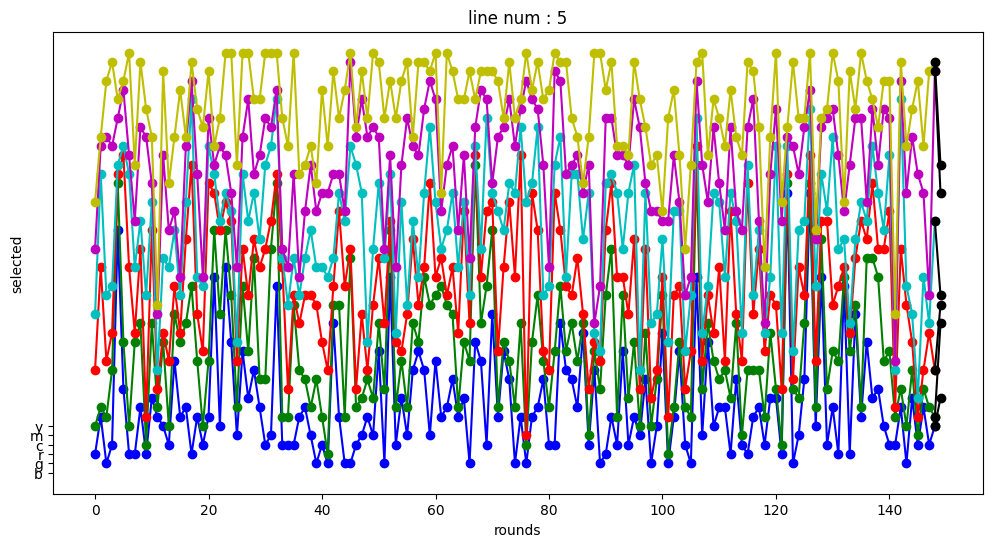

In [62]:
# for i in range(6):
#     draw_scatter([nums_by_row[i]], f'Line Num : {i+1}')
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])
# ext_datas =  [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6)]
# ext_datas =  [(0, 3), (1,7), (2,12), (3,26), (4,33), (5,40)]
ext_datas = []
for key in candidate:
    ext_datas.append((key, candidate[key]))

# show_cols = [0, 1, 2, 3, 4, 5]
show_cols = [0, 1, 2, 3, 4, 5]
show_label = False


draw_scatter(row_list, f'line num : {key}', True, True, show_cols, ext_datas, show_label)


/tmp/ipykernel_30201/2194371012.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, Y[show_col], 'bo', colors[show_col], label=label, color=colors[show_col])


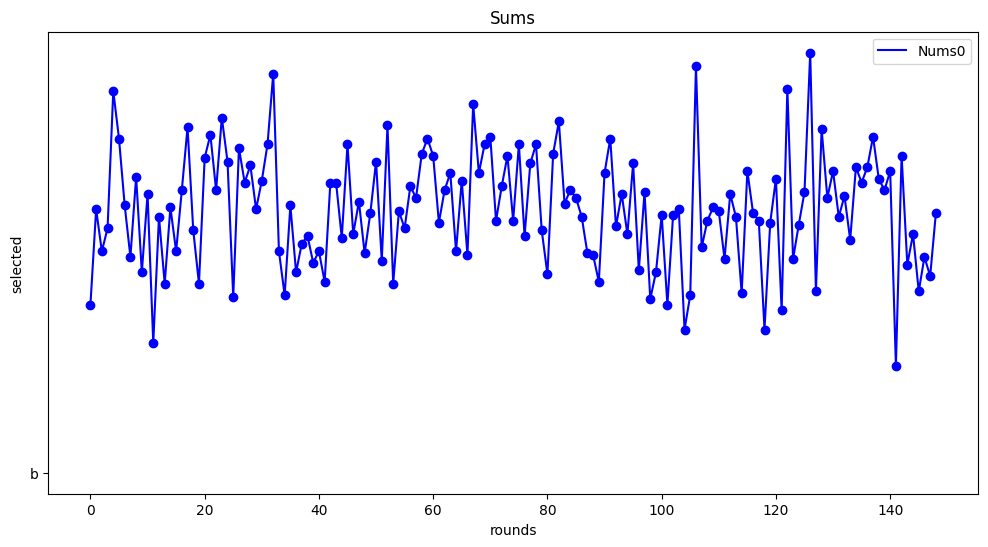

In [63]:
draw_scatter([sums[:-1]] + [sum(candidate.values())], f'Sums')

/tmp/ipykernel_30201/2194371012.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, Y[show_col], 'bo', colors[show_col], label=label, color=colors[show_col])
/tmp/ipykernel_30201/2194371012.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(loc, last[show_col], 'bo', color='k')


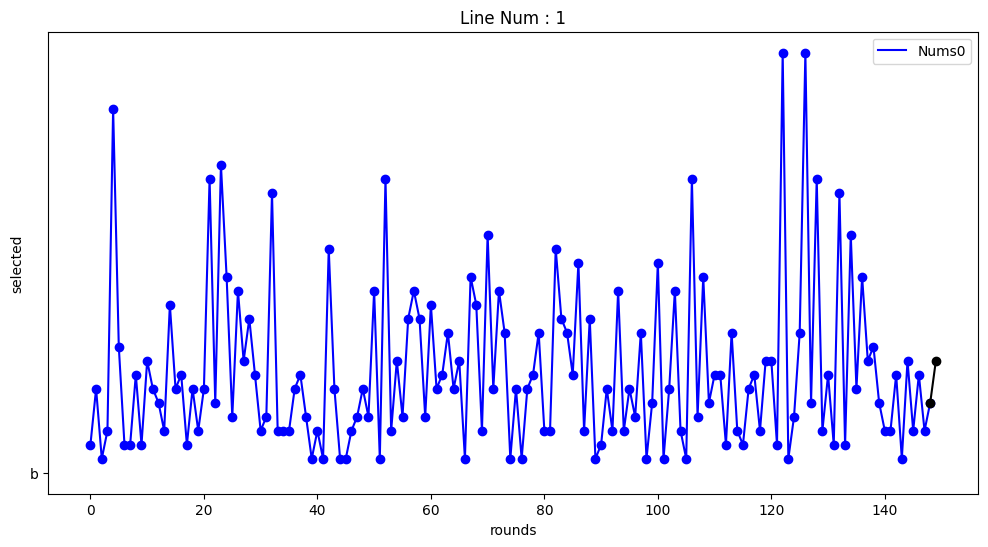

valuse min : [1, 2, 3, 4, 5]
valuse max : [20, 21, 22, 26, 30]
last value : [5, 3, 3, 7, 1, 8, 3, 7, 3, 5]
freq value : [(13, 6), (5, 7), (10, 7), (8, 9), (4, 10), (2, 11), (7, 13), (1, 15), (6, 18), (3, 24)]
최소값 : [3.5, 3.75, 4.0, 4.125, 4.125]
마지막 : [4.875, 4.625, 4.375, 4.625, 5.25]


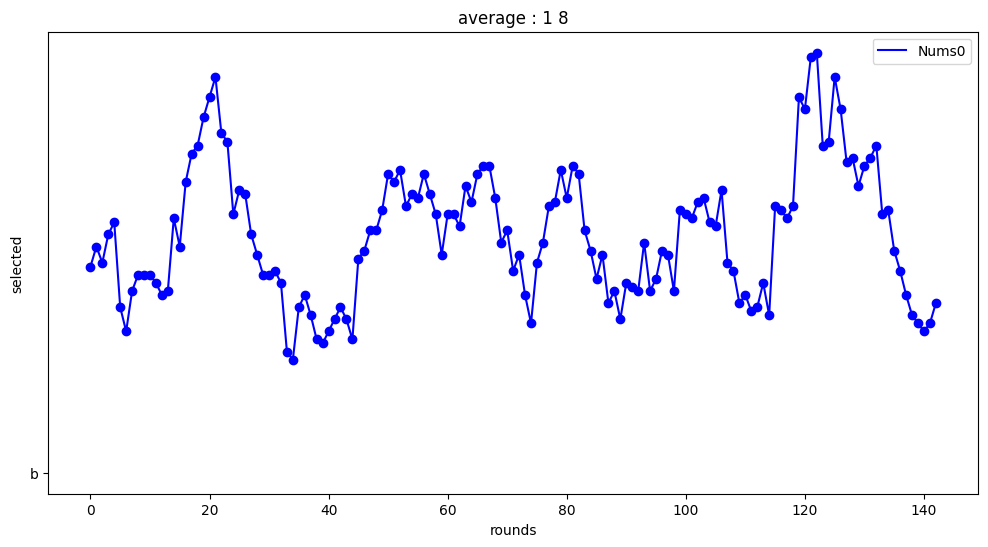

최소값 : [4.0, 4.2, 4.3, 4.5, 4.5]
마지막 : [6.1, 5.4, 4.9, 4.5, 4.8]


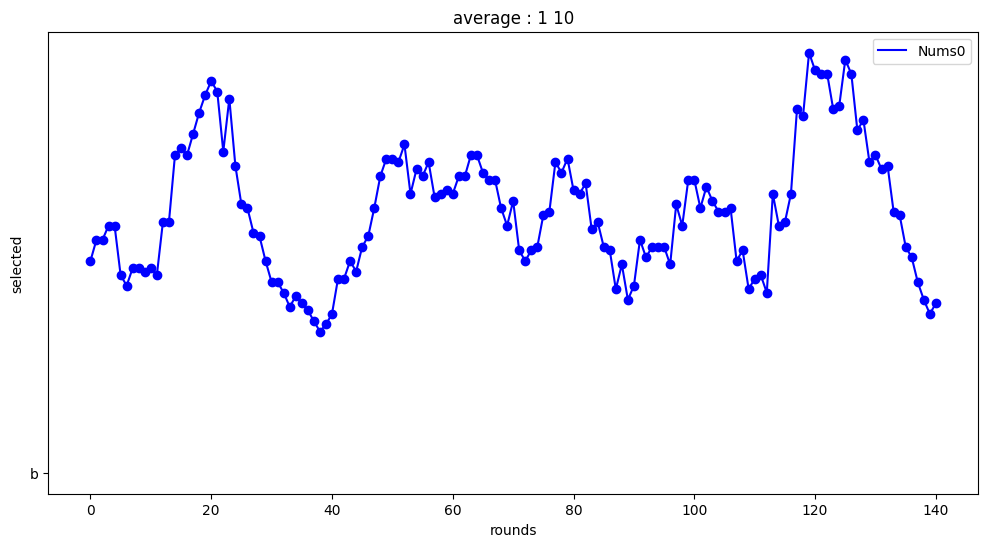

최소값 : [4.230769230769231, 4.230769230769231, 4.3076923076923075, 4.384615384615385, 4.538461538461538]
마지막 : [6.615384615384615, 7.0, 5.923076923076923, 5.846153846153846, 5.384615384615385]


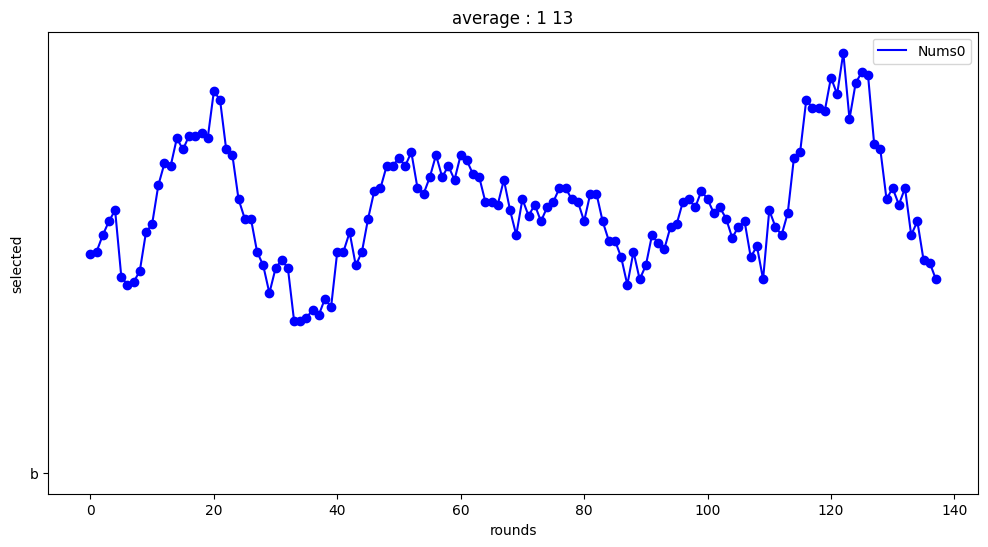

In [60]:
selected = 0
ext_data = 8
draw_scatter(row_list_none_last, f'Line Num : {selected+1}', True, True, [selected], [(selected,ext_data)])
import numpy as np
length = 8
my_list = row_list_none_last[selected] + [ext_data]
ordered = my_list.copy()
ordered.sort()
ordered_dict = {}
for i in ordered:
    if i not in ordered_dict:
        ordered_dict[i] = 1
    else:
        ordered_dict[i] += 1
ordered_dict_sorted = sorted(ordered_dict.items(), key=lambda item: item[1])
ordered = list(set(ordered))
print(f'valuse min : {ordered[:5]}')
print(f'valuse max : {ordered[-5:]}')
print(f'last value : {row_list_none_last[0][-10:]}')
print(f'freq value : {ordered_dict_sorted[-10:]}')
draw_average(my_list, length=8, selected=selected)
draw_average(my_list, length=10, selected=selected)
draw_average(my_list, length=13, selected=selected)
candidate[selected] = ext_data

/tmp/ipykernel_30201/2194371012.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, Y[show_col], 'bo', colors[show_col], label=label, color=colors[show_col])
/tmp/ipykernel_30201/2194371012.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(loc, last[show_col], 'bo', color='k')


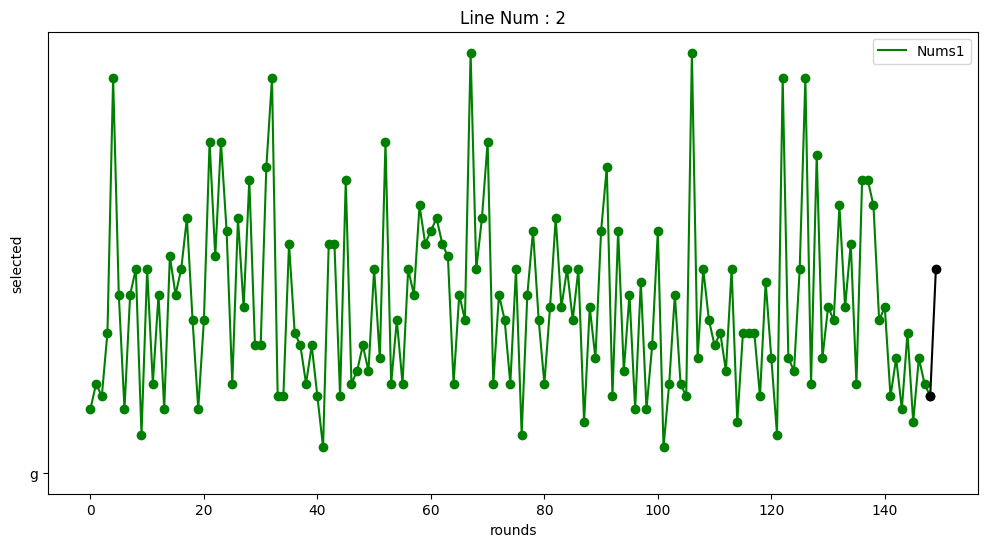

valuse min : [2, 3, 4, 5, 6]
valuse max : [24, 25, 26, 31, 33]
last value : [5, 3, 3, 7, 1, 8, 3, 7, 3, 5]
freq value : [(5, 7), (10, 7), (11, 7), (13, 7), (9, 8), (6, 10), (12, 10), (14, 10), (16, 13), (7, 16)]
최소값 : [7.125, 8.0, 8.375, 8.625, 8.75]
마지막 : [10.125, 8.625, 8.0, 7.125, 8.375]


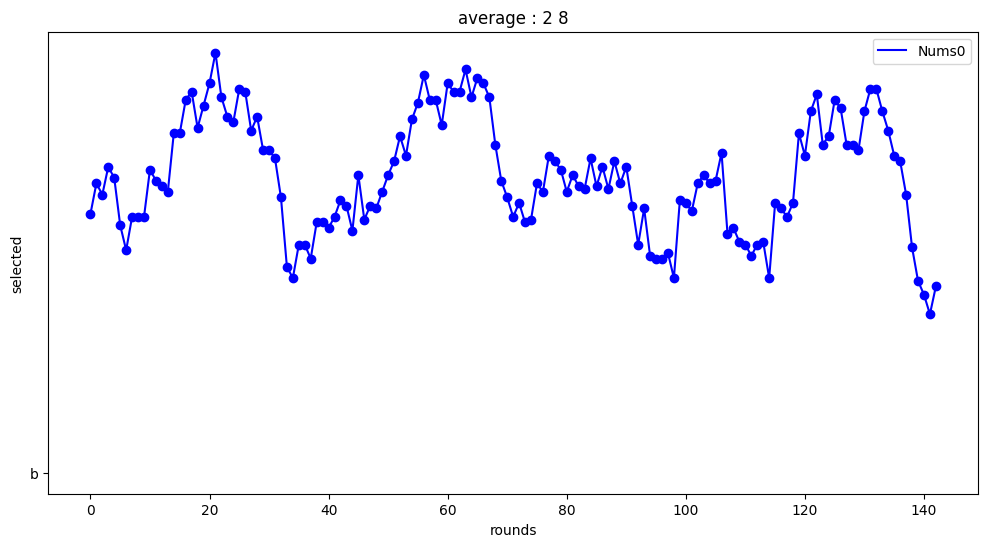

최소값 : [8.2, 8.6, 9.0, 9.4, 9.4]
마지막 : [12.7, 11.3, 9.7, 8.2, 8.6]


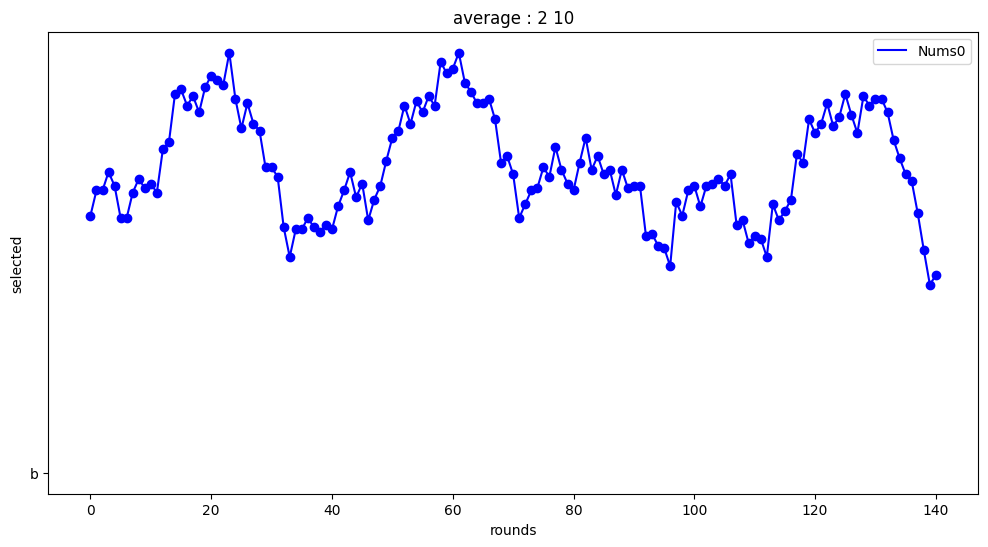

최소값 : [9.76923076923077, 10.076923076923077, 10.076923076923077, 10.23076923076923, 10.461538461538462]
마지막 : [12.692307692307692, 12.384615384615385, 11.538461538461538, 11.461538461538462, 10.923076923076923]


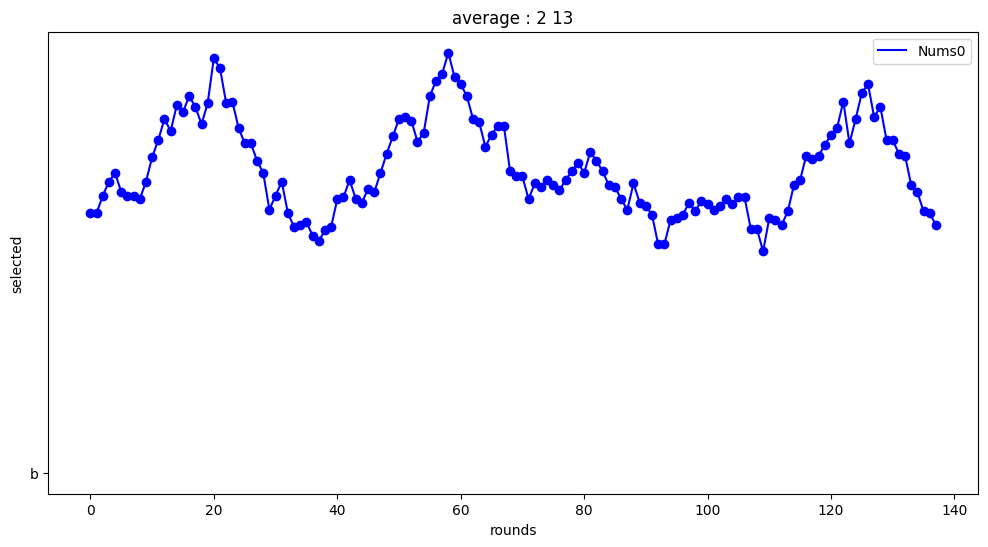

In [58]:
selected = 1
ext_data = 16
draw_scatter(row_list_none_last, f'Line Num : {selected+1}', True, True, [selected], [(selected,ext_data)])
import numpy as np
length = 15
my_list = row_list_none_last[selected] + [ext_data]
ordered = my_list.copy()
ordered.sort()
ordered_dict = {}
for i in ordered:
    if i not in ordered_dict:
        ordered_dict[i] = 1
    else:
        ordered_dict[i] += 1
ordered_dict_sorted = sorted(ordered_dict.items(), key=lambda item: item[1])
ordered = list(set(ordered))
print(f'valuse min : {ordered[:5]}')
print(f'valuse max : {ordered[-5:]}')
print(f'last value : {row_list_none_last[0][-10:]}')
print(f'freq value : {ordered_dict_sorted[-10:]}')
draw_average(my_list, length=8, selected=selected)
draw_average(my_list, length=10, selected=selected)
draw_average(my_list, length=13, selected=selected)
candidate[selected] = ext_data

/tmp/ipykernel_30201/1517550225.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, Y[show_col], 'bo', colors[show_col], label=label, color=colors[show_col])
/tmp/ipykernel_30201/1517550225.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(loc, last[show_col], 'bo', color='k')


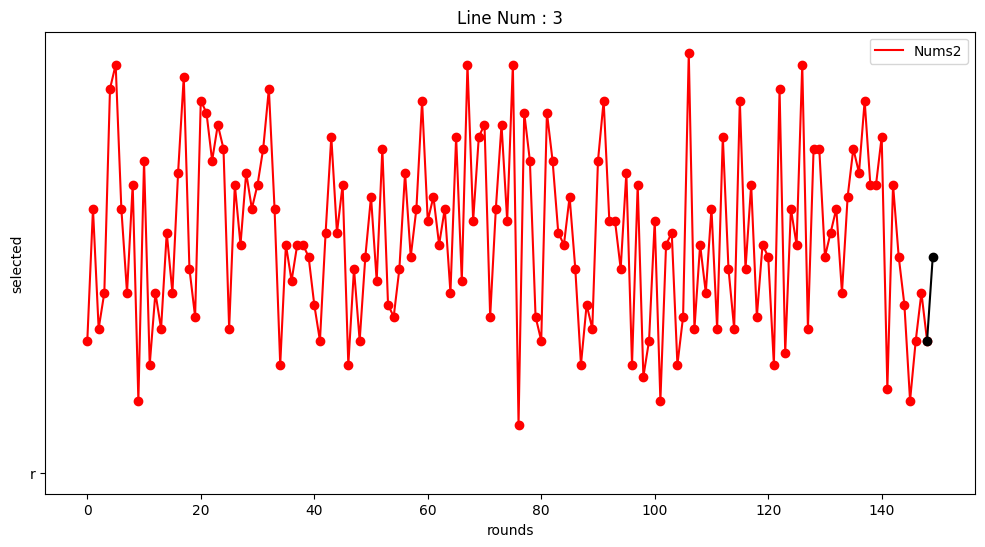

valuse min : [4, 6, 7, 8, 9]
valuse max : [31, 32, 33, 34, 35]
last value : [5, 3, 3, 7, 1, 8, 3, 7, 3, 5]
freq value : [(27, 6), (9, 7), (11, 7), (17, 7), (18, 7), (12, 8), (15, 8), (24, 9), (19, 10), (22, 10)]
최소값 : [13.25, 13.375, 14.625, 14.75, 14.75]
마지막 : [18.125, 16.5, 15.375, 13.25, 14.625]


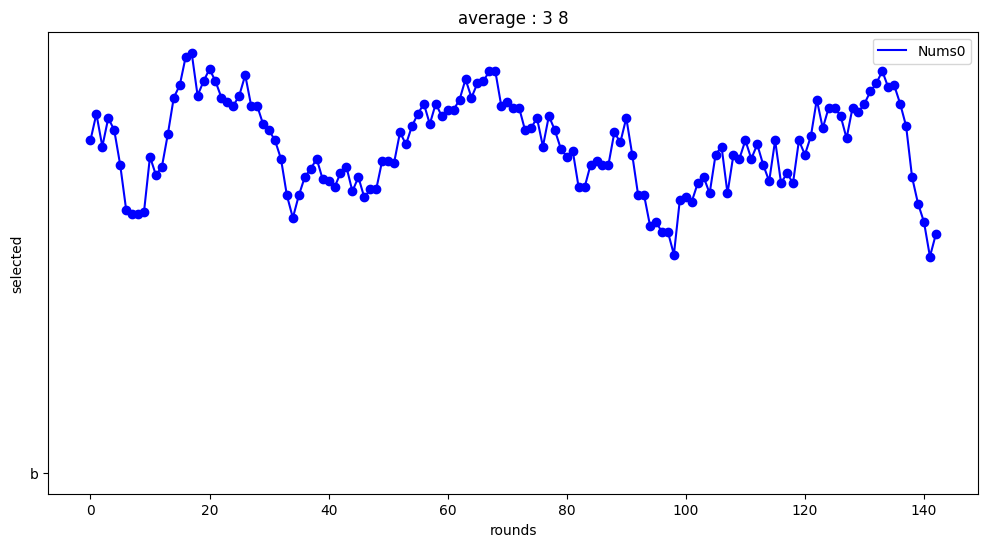

최소값 : [14.0, 15.2, 15.2, 15.4, 15.8]
마지막 : [20.1, 18.7, 17.1, 15.8, 15.2]


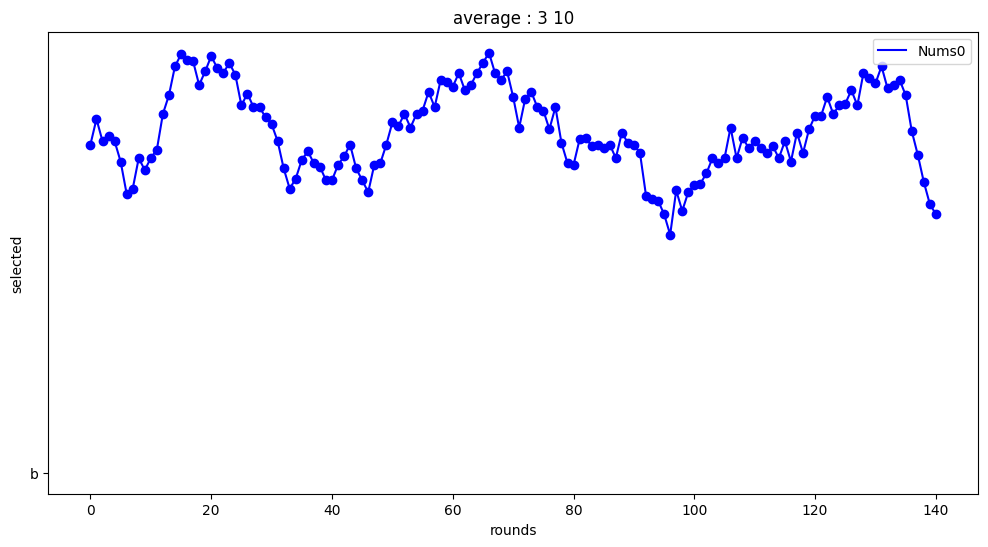

최소값 : [15.615384615384615, 15.846153846153847, 16.153846153846153, 16.23076923076923, 16.307692307692307]
마지막 : [20.46153846153846, 20.153846153846153, 19.53846153846154, 18.307692307692307, 17.76923076923077]


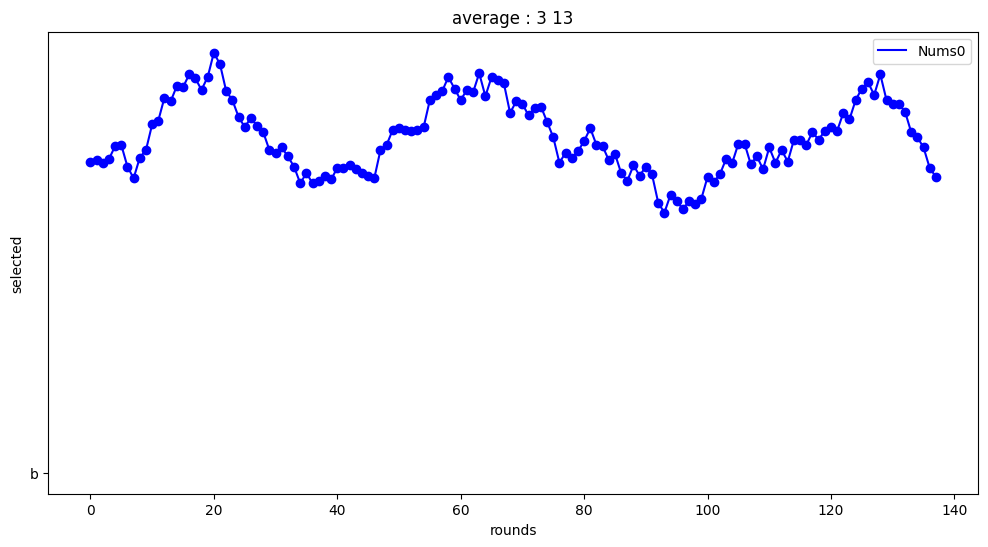

In [75]:
selected = 2
ext_data = 18
draw_scatter(row_list_none_last, f'Line Num : {selected+1}', True, True, [selected], [(selected,ext_data)])
import numpy as np
length = 10
my_list = row_list_none_last[selected] + [ext_data]
ordered = my_list.copy()
ordered.sort()
ordered_dict = {}
for i in ordered:
    if i not in ordered_dict:
        ordered_dict[i] = 1
    else:
        ordered_dict[i] += 1
ordered_dict_sorted = sorted(ordered_dict.items(), key=lambda item: item[1])
ordered = list(set(ordered))
print(f'valuse min : {ordered[:5]}')
print(f'valuse max : {ordered[-5:]}')
print(f'last value : {row_list_none_last[0][-10:]}')
print(f'freq value : {ordered_dict_sorted[-10:]}')
draw_average(my_list, length=8, selected=selected)
draw_average(my_list, length=10, selected=selected)
draw_average(my_list, length=13, selected=selected)
candidate[selected] = ext_data

/tmp/ipykernel_30201/2194371012.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, Y[show_col], 'bo', colors[show_col], label=label, color=colors[show_col])
/tmp/ipykernel_30201/2194371012.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(loc, last[show_col], 'bo', color='k')


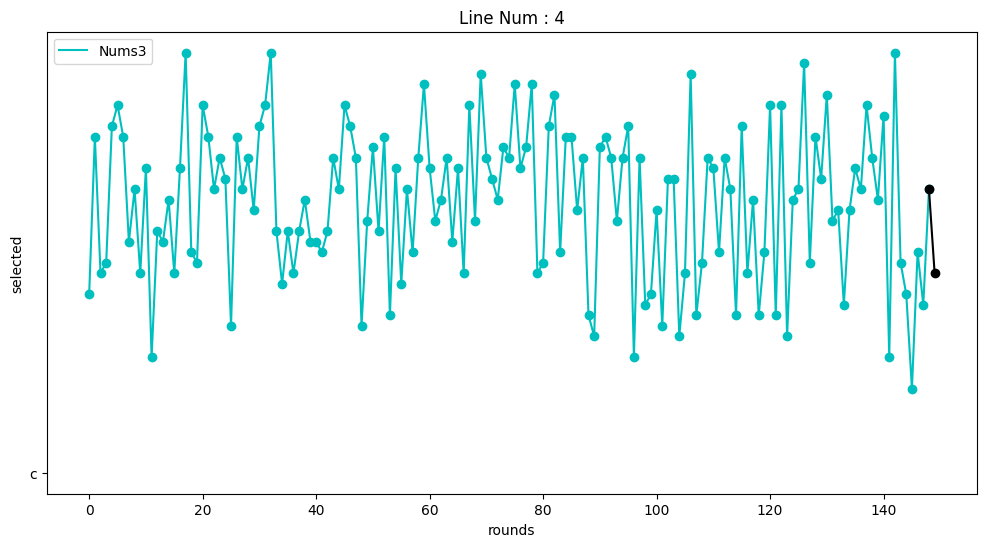

valuse min : [8, 11, 13, 14, 15]
valuse max : [36, 37, 38, 39, 40]
last value : [5, 3, 3, 7, 1, 8, 3, 7, 3, 5]
freq value : [(23, 6), (33, 6), (21, 7), (26, 7), (29, 8), (35, 8), (19, 9), (27, 9), (32, 9), (30, 15)]
최소값 : [20.0, 20.0, 20.875, 21.0, 21.125]
마지막 : [23.25, 22.125, 20.875, 20.0, 21.0]


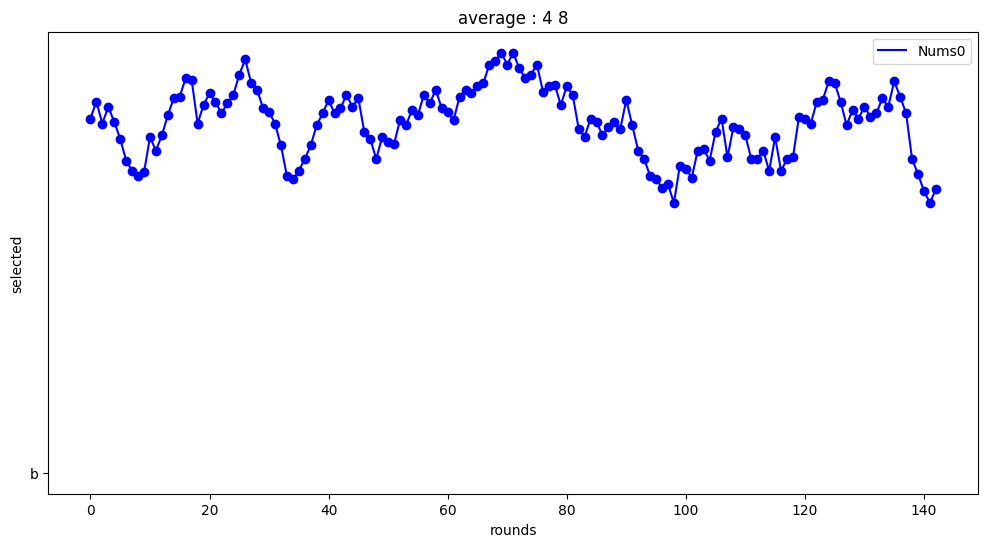

최소값 : [20.1, 21.3, 21.3, 21.5, 21.7]
마지막 : [24.8, 24.2, 22.3, 22.0, 21.3]


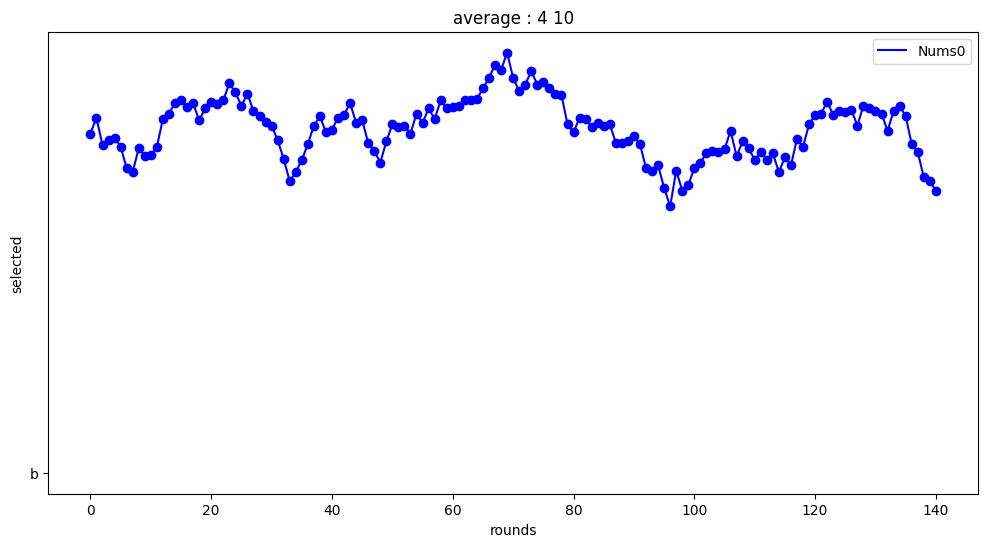

최소값 : [21.076923076923077, 22.076923076923077, 22.153846153846153, 22.46153846153846, 22.53846153846154]
마지막 : [24.46153846153846, 24.846153846153847, 24.153846153846153, 24.0, 23.384615384615383]


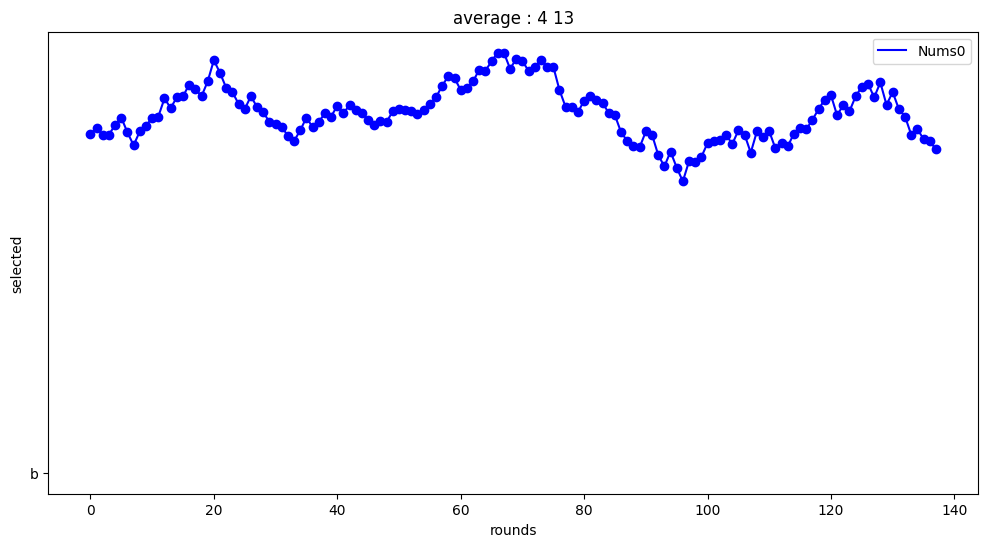

In [70]:
selected = 3
ext_data = 19
draw_scatter(row_list_none_last, f'Line Num : {selected+1}', True, True, [selected], [(selected,ext_data)])
import numpy as np
length = 10
my_list = row_list_none_last[selected] + [ext_data]
ordered = my_list.copy()
ordered.sort()
ordered_dict = {}
for i in ordered:
    if i not in ordered_dict:
        ordered_dict[i] = 1
    else:
        ordered_dict[i] += 1
ordered_dict_sorted = sorted(ordered_dict.items(), key=lambda item: item[1])
ordered = list(set(ordered))
print(f'valuse min : {ordered[:5]}')
print(f'valuse max : {ordered[-5:]}')
print(f'last value : {row_list_none_last[0][-10:]}')
print(f'freq value : {ordered_dict_sorted[-10:]}')
draw_average(my_list, length=8, selected=selected)
draw_average(my_list, length=10, selected=selected)
draw_average(my_list, length=13, selected=selected)
candidate[selected] = ext_data

/tmp/ipykernel_30201/2194371012.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, Y[show_col], 'bo', colors[show_col], label=label, color=colors[show_col])
/tmp/ipykernel_30201/2194371012.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(loc, last[show_col], 'bo', color='k')


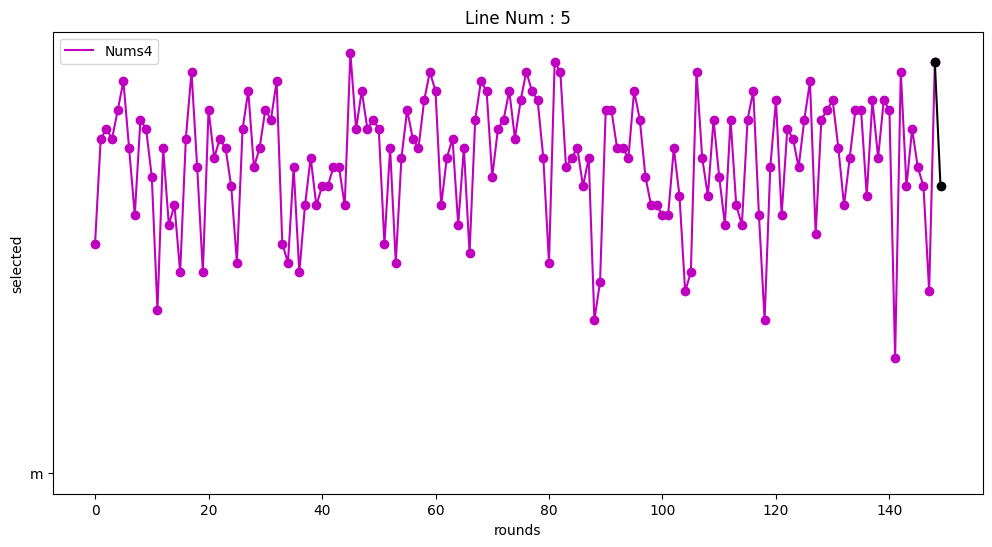

valuse min : [12, 16, 17, 19, 20]
valuse max : [40, 41, 42, 43, 44]
last value : [5, 3, 3, 7, 1, 8, 3, 7, 3, 5]
freq value : [(39, 7), (35, 8), (40, 8), (28, 9), (32, 9), (36, 9), (38, 10), (33, 11), (37, 11), (34, 12)]
최소값 : [26.625, 27.25, 27.875, 28.0, 28.375]
마지막 : [32.75, 32.375, 29.875, 30.5, 32.75]


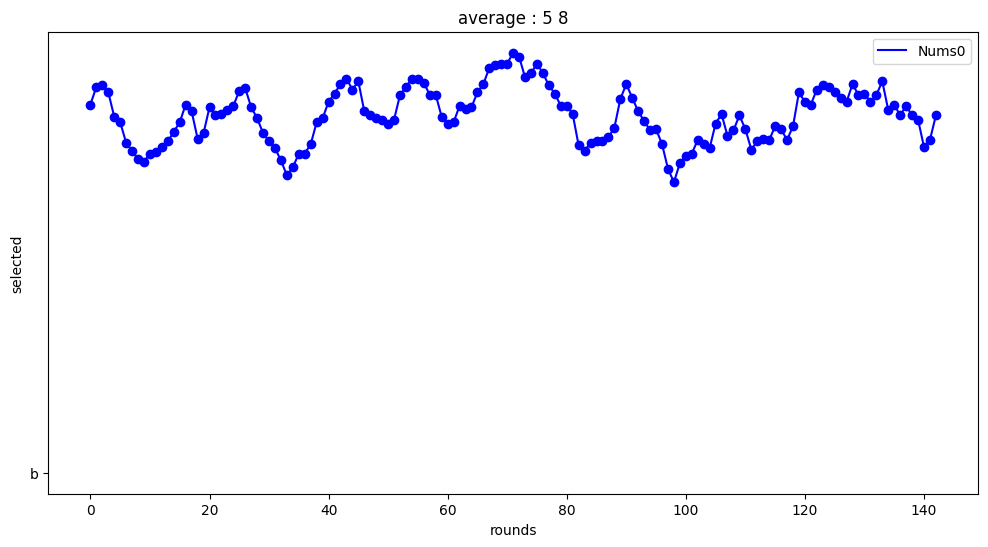

최소값 : [28.0, 28.1, 28.6, 28.7, 28.8]
마지막 : [33.0, 33.1, 31.1, 32.1, 31.2]


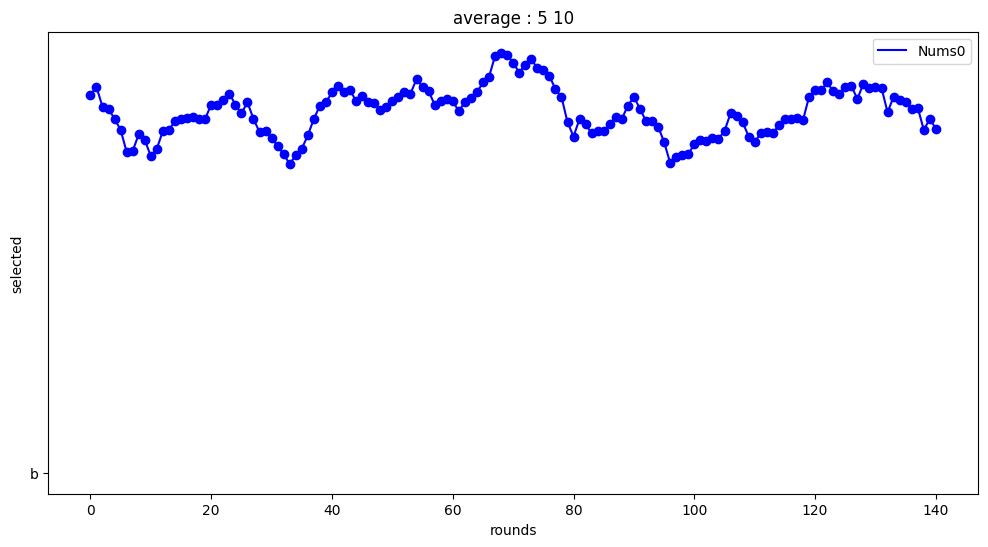

최소값 : [29.307692307692307, 29.46153846153846, 29.53846153846154, 29.615384615384617, 29.615384615384617]
마지막 : [33.76923076923077, 33.53846153846154, 32.07692307692308, 32.46153846153846, 32.53846153846154]


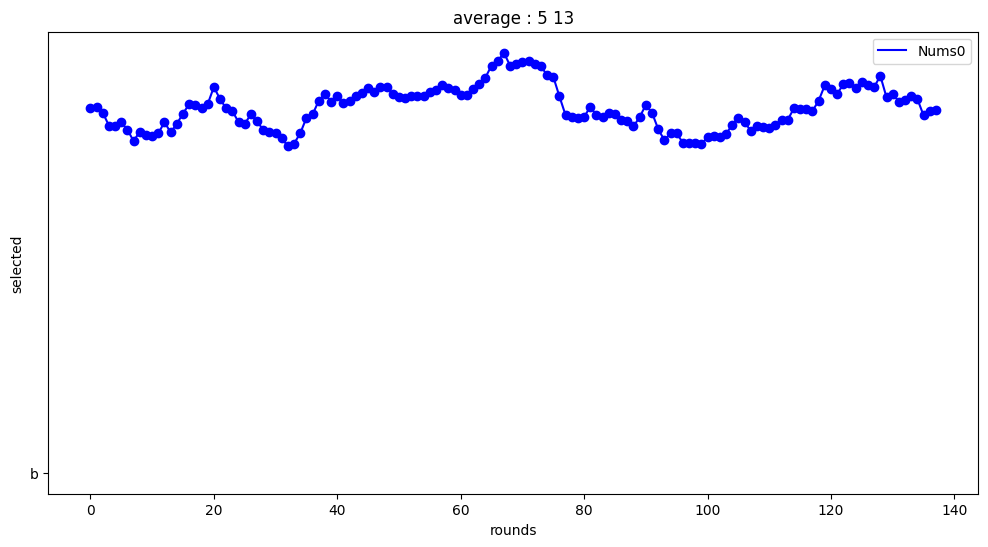

In [71]:
selected = 4
ext_data = 30
draw_scatter(row_list_none_last, f'Line Num : {selected+1}', True, True, [selected], [(selected,ext_data)])
import numpy as np
length = 10
my_list = row_list_none_last[selected] + [ext_data]
ordered = my_list.copy()
ordered.sort()
ordered_dict = {}
for i in ordered:
    if i not in ordered_dict:
        ordered_dict[i] = 1
    else:
        ordered_dict[i] += 1
ordered_dict_sorted = sorted(ordered_dict.items(), key=lambda item: item[1])
ordered = list(set(ordered))
print(f'valuse min : {ordered[:5]}')
print(f'valuse max : {ordered[-5:]}')
print(f'last value : {row_list_none_last[0][-10:]}')
print(f'freq value : {ordered_dict_sorted[-10:]}')
draw_average(my_list, length=8, selected=selected)
draw_average(my_list, length=10, selected=selected)
draw_average(my_list, length=13, selected=selected)
candidate[selected] = ext_data

/tmp/ipykernel_30201/2194371012.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, Y[show_col], 'bo', colors[show_col], label=label, color=colors[show_col])
/tmp/ipykernel_30201/2194371012.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(loc, last[show_col], 'bo', color='k')


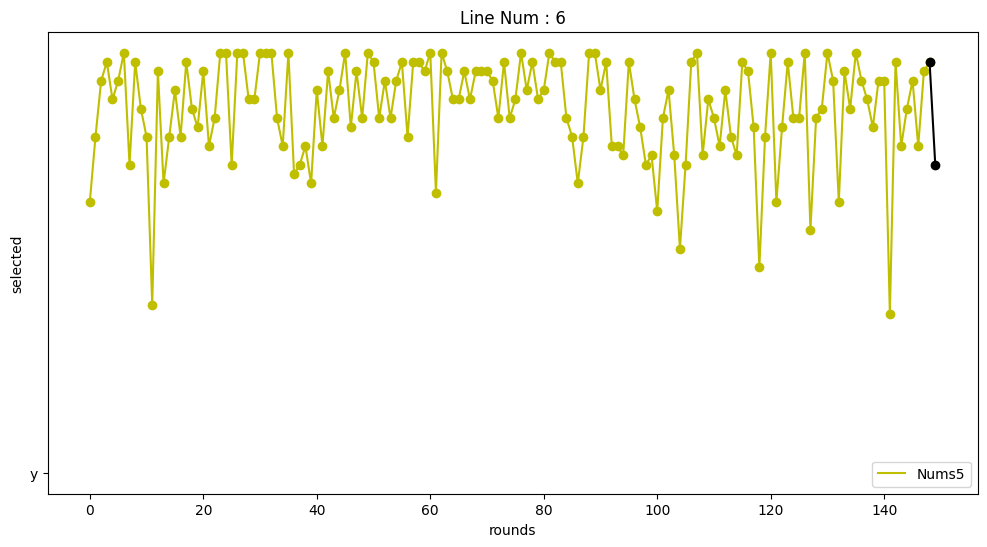

valuse min : [17, 18, 22, 24, 26]
valuse max : [41, 42, 43, 44, 45]
last value : [5, 3, 3, 7, 1, 8, 3, 7, 3, 5]
freq value : [(37, 6), (41, 8), (35, 9), (36, 9), (42, 10), (40, 11), (43, 13), (38, 14), (44, 18), (45, 22)]
최소값 : [33.125, 33.625, 34.5, 35.0, 35.0]
마지막 : [37.25, 37.0, 37.125, 37.375, 39.375]


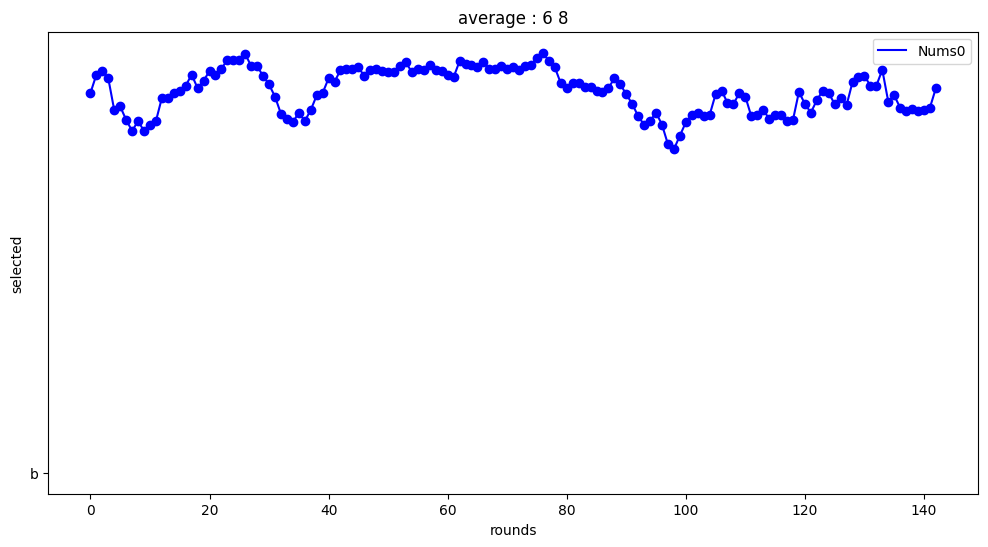

최소값 : [34.2, 34.6, 35.3, 35.4, 35.5]
마지막 : [38.0, 37.3, 37.6, 38.3, 37.4]


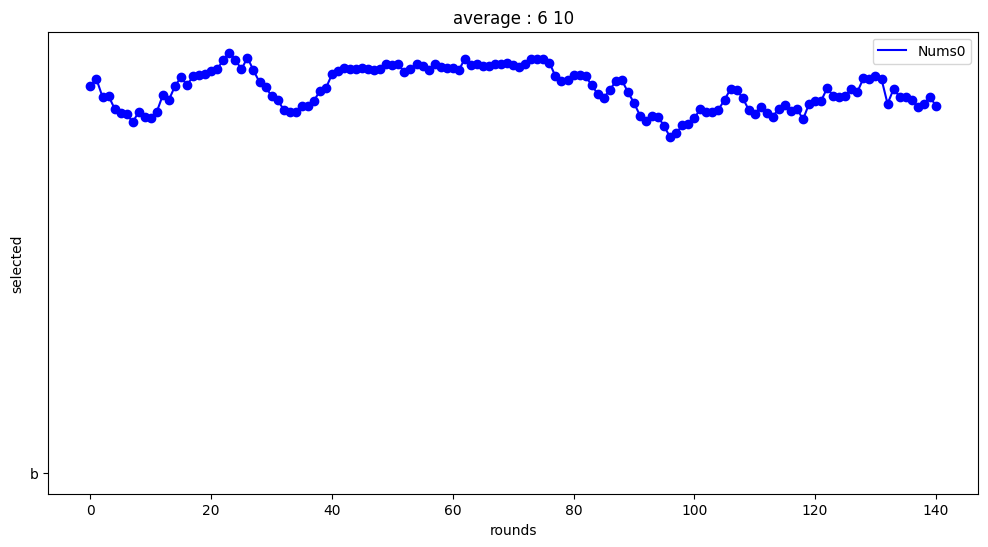

최소값 : [35.0, 35.15384615384615, 35.69230769230769, 35.76923076923077, 35.76923076923077]
마지막 : [39.0, 38.38461538461539, 38.69230769230769, 38.61538461538461, 37.92307692307692]


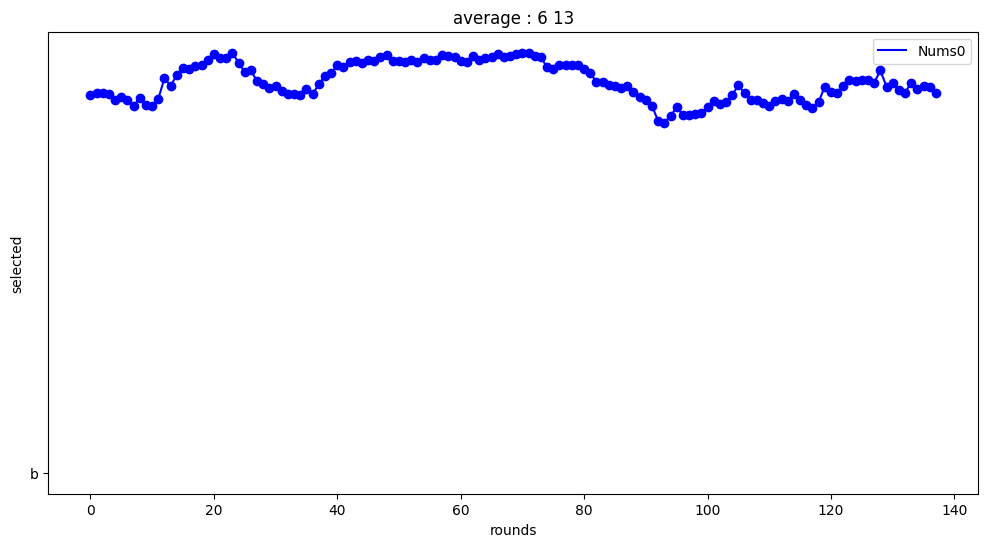

In [72]:
selected = 5
ext_data = 33
draw_scatter(row_list_none_last, f'Line Num : {selected+1}', True, True, [selected], [(selected,ext_data)])
import numpy as np
length = 10
my_list = row_list_none_last[selected] + [ext_data]
ordered = my_list.copy()
ordered.sort()
ordered_dict = {}
for i in ordered:
    if i not in ordered_dict:
        ordered_dict[i] = 1
    else:
        ordered_dict[i] += 1
ordered_dict_sorted = sorted(ordered_dict.items(), key=lambda item: item[1])
ordered = list(set(ordered))
print(f'valuse min : {ordered[:5]}')
print(f'valuse max : {ordered[-5:]}')
print(f'last value : {row_list_none_last[0][-10:]}')
print(f'freq value : {ordered_dict_sorted[-10:]}')
draw_average(my_list, length=8, selected=selected)
draw_average(my_list, length=10, selected=selected)
draw_average(my_list, length=13, selected=selected)
candidate[selected] = ext_data

In [73]:
print(candidate)

{0: 8, 1: 16, 2: 18, 3: 19, 4: 30, 5: 33}


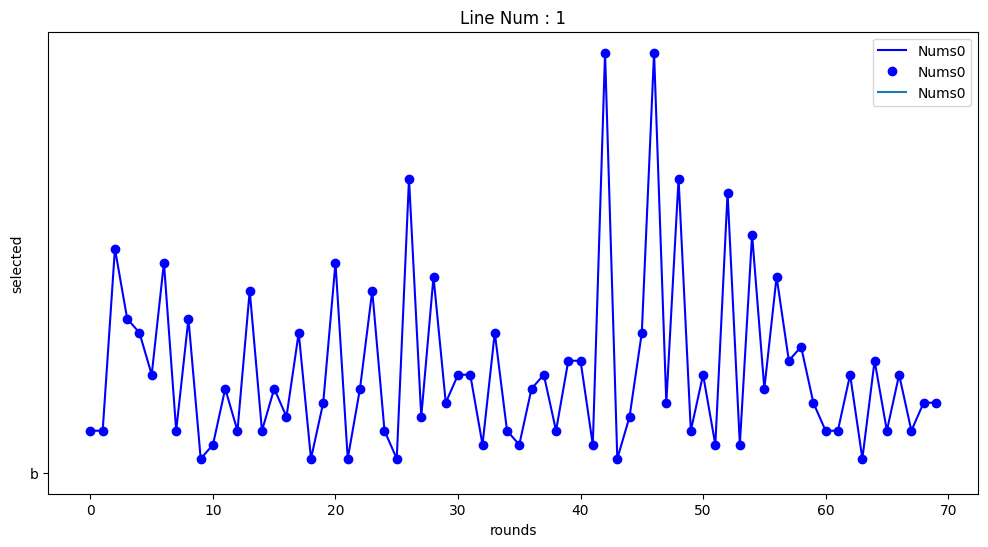

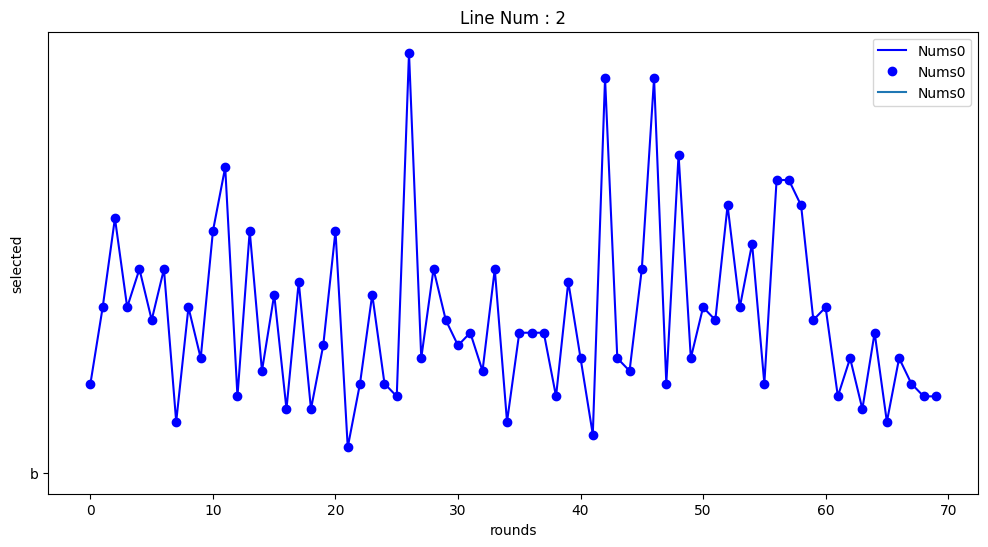

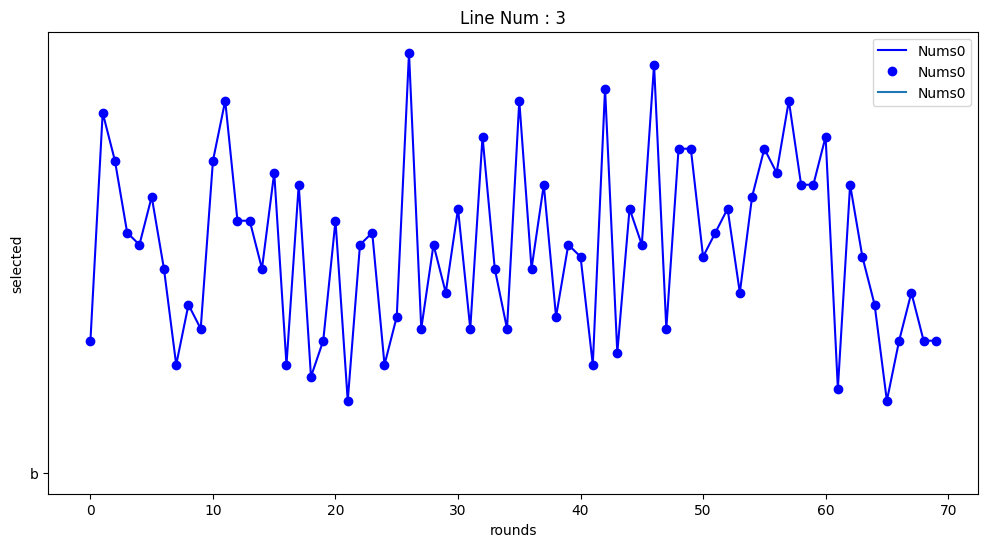

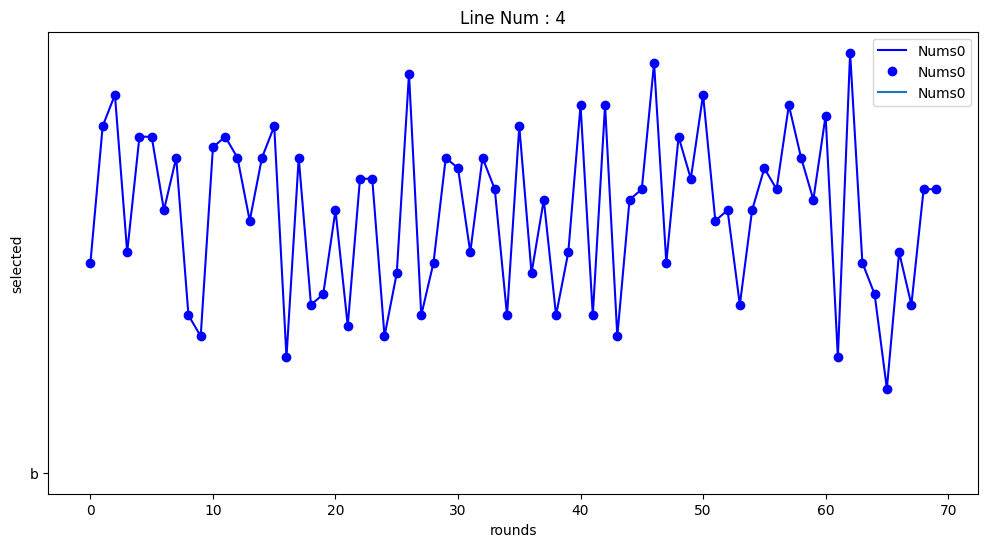

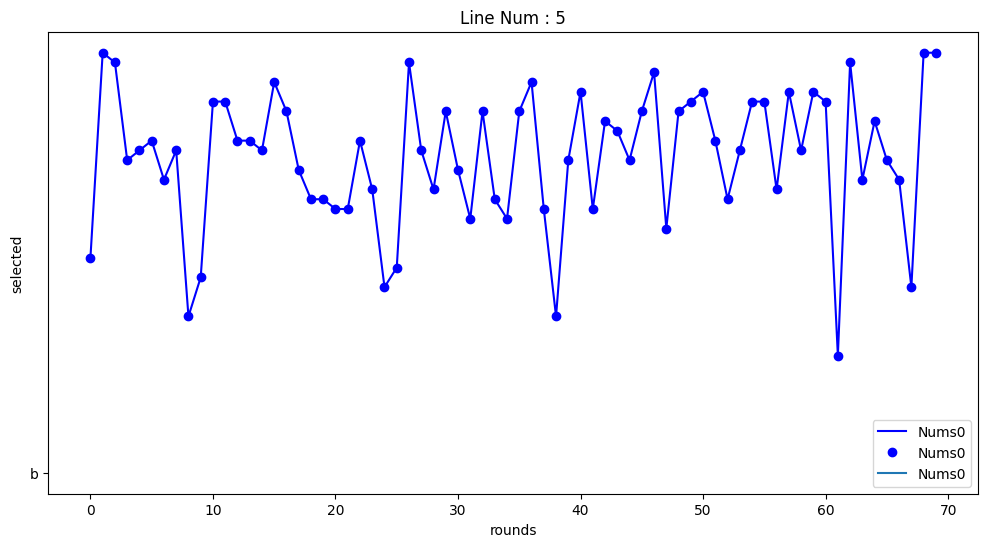

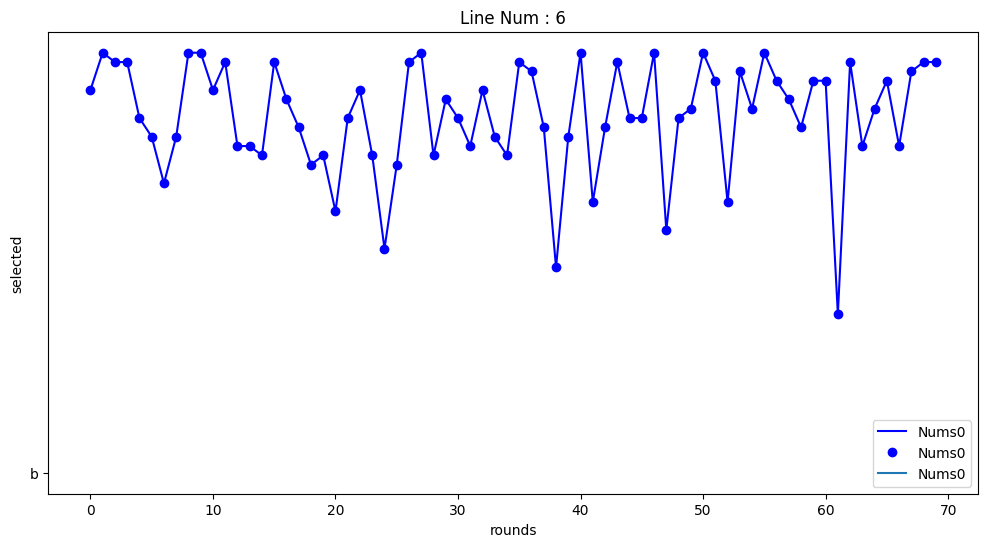

In [115]:
for i in range(6):
    draw_scatter([nums_by_row[i]], f'Line Num : {i+1}')

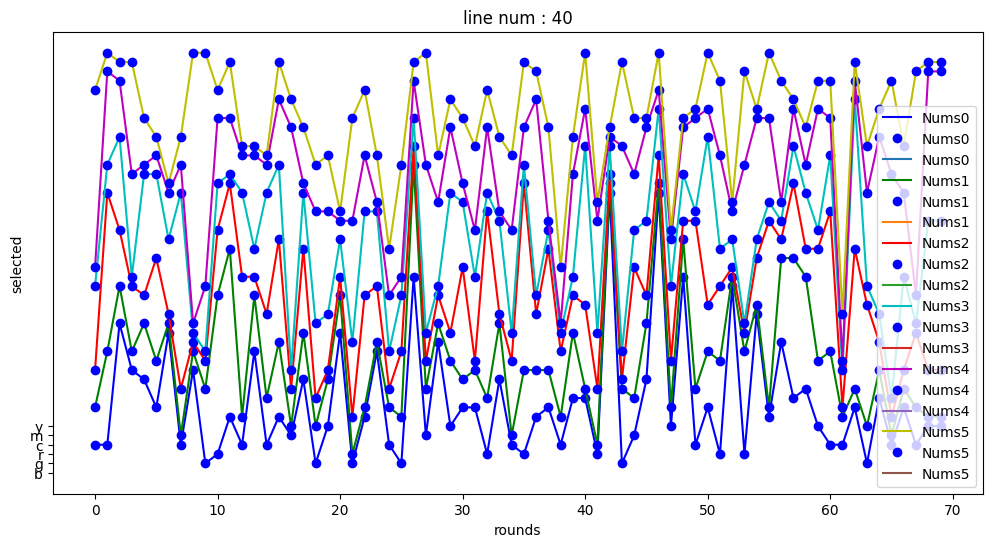

In [116]:
# for i in range(6):
#     draw_scatter([nums_by_row[i]], f'Line Num : {i+1}')
row_list = []
for nums in nums_by_row:
    row_list.append(nums)
draw_scatter(row_list, f'line num : {key}', True, True, [0,1,2,3,4,5])

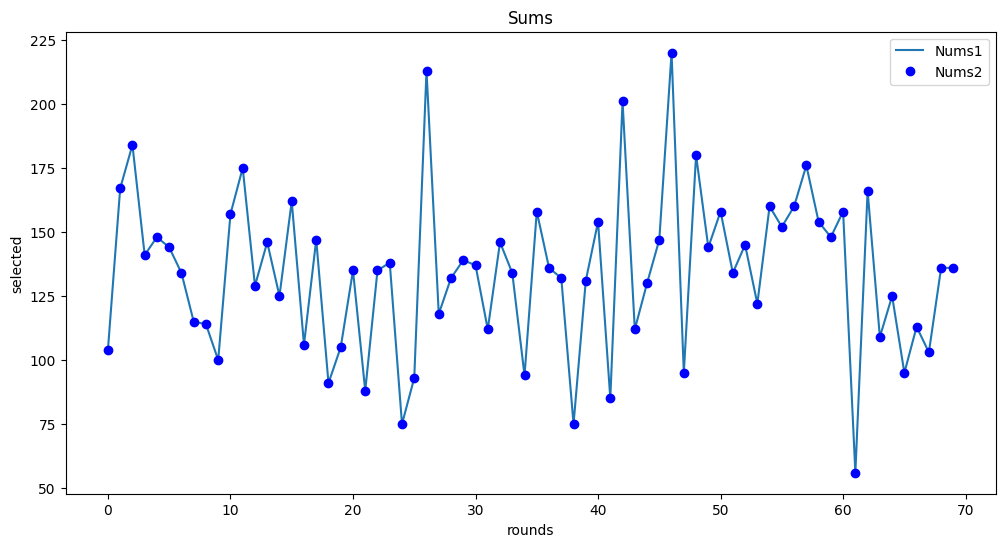

In [55]:
draw_scatter([sums], f'Sums')

In [ ]:
print(sums)
datas = (
    ((1750505603, [[7, 10, 18, 23, 28, 39]]), 0.5),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((1750505748, [[6, 9, 20, 25, 31, 42]]), 575.33),
    ((115870, [[8, 11, 19, 26, 30, 43]]), 32.164),
    )
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')

In [113]:
print(sums[-20:])
datas = (
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((114225, [[10, 13, 20, 24, 30, 40]]), 202.36),
    ((11114613, [[8, 12, 21, 26, 31, 39]]), 77.591),
    ((31116739, [[6, 9, 21, 28, 32, 42]]), 730.62006),
    ((114106, [[9, 12, 21, 26, 30, 40]]), 393.44),
    ((31116775, [[8, 13, 21, 27, 34, 41]]), 302.73),
)
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]
   ]
for i in l1:
    print(i)
    print(f'sum = {sum(i)}')
last = [3, 7, 15, 16, 19, 43]
print(f'{"*"*20}\nlast : \n{last}\nsum = {sum(last)}')


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 103]
[10, 13, 19, 23, 28, 40]
sum = 133
[7, 12, 24, 28, 34, 41]
sum = 146
[10, 13, 20, 24, 30, 40]
sum = 137
[8, 12, 21, 26, 31, 39]
sum = 137
[6, 9, 21, 28, 32, 42]
sum = 138
[9, 12, 21, 26, 30, 40]
sum = 138
[8, 13, 21, 27, 34, 41]
sum = 144
[12, 21, 26, 28, 34, 39]
sum = 160
[13, 20, 24, 30, 40, 42]
sum = 169
********************
last : 
[3, 7, 15, 16, 19, 43]
sum = 103


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 138]


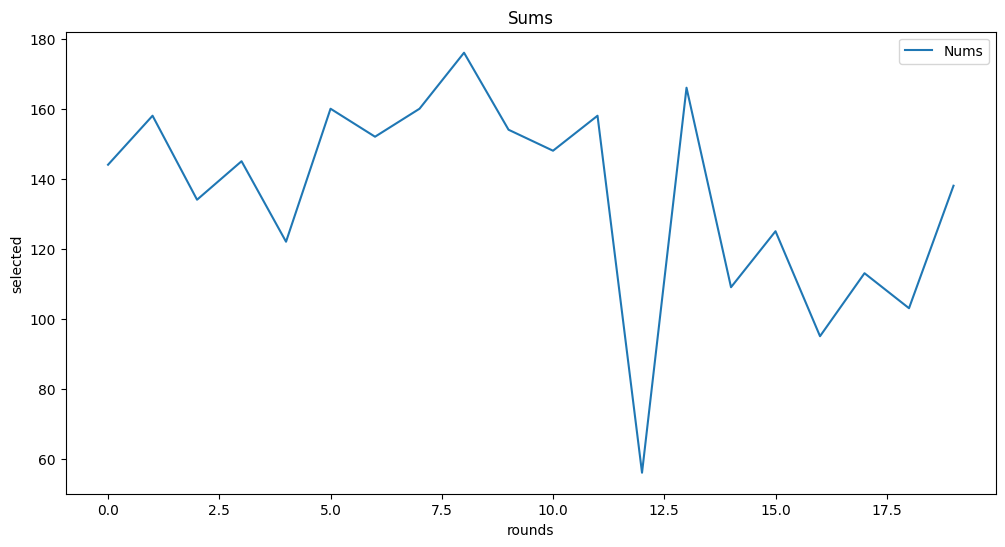

In [115]:
draw_graph(sums[-20:-1]+[138], f'Sums')

In [ ]:
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]]
for i in l1:
    print(sum(i))